**Author:** Louis Ziemah

# Enhancing Metallurgical Plant Operations: Insights from PCA Analysis of Operational Data

**<center>Introduction</center>**
This report delves into a detailed analysis of operational data from a mining site, focusing on critical parameters such as plant throughput, head grade, Carbon-in-Leach (CIL) recovery, Knelson Concentrator (KC) recovery, and overall recovery. The study leverages Principal Component Analysis (PCA) to unearth underlying patterns and relationships within the dataset, aimed at offering strategic insights to optimize gold recovery processes effectively.

Efficient recovery processes are pivotal in extracting gold from ore in mining operations. Variables such as throughput (ore processed per day), head grade (gold concentration in ore), and the efficiencies of CIL and KC recovery processes significantly influence overall recovery. This study utilizes a comprehensive dataset of daily plant operations, encompassing fluctuations in throughput, head grade, CIL recovery, KC recovery, and their combined impact on overall recovery. Initial exploratory analysis through correlation studies revealed intricate relationships, further elucidated using PCA to reduce data dimensionality and enhance clarity. By discerning operational trends and their implications on recovery efficiencies, this report aims to provide actionable insights for optimizing processing conditions, enhancing recovery rates, and driving economic performance improvements in the mining operation.

**Project Objectives**

**Conduct Detailed Operational Analysis:** Analyze daily operational data from a mining site, focusing on variables such as plant throughput, head grade, Carbon-in-Leach (CIL) recovery, and overall recovery to understand their individual contributions to gold extraction efficiency.

**Uncover Key Relationships Using PCA:** Utilize Principal Component Analysis (PCA) to uncover underlying patterns and relationships among throughput, head grade, and recovery efficiencies. This analysis aims to provide a nuanced understanding of how these variables interact and influence each other in the gold recovery process.

**Provide Strategic Insights and Decision Support:** Offer actionable insights and strategic recommendations based on PCA findings to optimize gold recovery processes, improve recovery rates, and enhance the economic performance of the mining operation. By presenting clear and interpretable data-driven insights, support stakeholders and decision-makers in making informed decisions to optimize processing conditions, manage throughput levels effectively, and maximize overall gold recovery.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [47]:
# Importing a preprocessed dataset
df = pd.read_csv('TPH.csv')
# Drop the 'Date' column
df = df.drop(columns=['Date'])
df.head()

,Throughput,Head Grade,CIL Recovery,OVERALL Recovery
0,190.905136,2.04,0.915825,0.957
1,191.729252,2.22,0.921849,0.968
2,192.384037,1.56,0.913860,0.950
3,188.634801,2.12,0.911217,0.955
4,187.927372,1.79,0.883239,0.941


In [48]:
df.describe()

,Throughput,Head Grade,CIL Recovery,OVERALL Recovery
count,179.000000,179.000000,179.000000,179.000000
mean,202.124279,3.254078,0.902182,0.941602
std,17.255082,1.249048,0.021727,0.018650
min,135.153198,1.190000,0.780639,0.870786
25%,190.158568,2.500000,0.891578,0.932551
50%,197.615902,3.000000,0.902606,0.944000
75%,215.027824,3.620000,0.915189,0.954630
max,246.585344,11.250000,0.944217,0.980000


# Visualizing correlations in the raw data using Correlation Matrix

<AxesSubplot:>

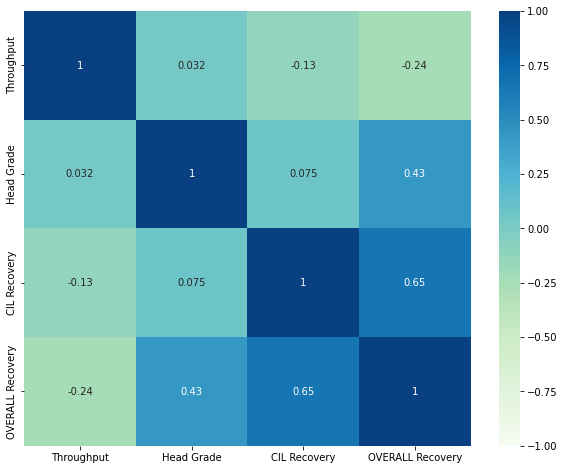

In [49]:
corr = df.corr()
plt.figure(figsize = [10, 8])

sns.heatmap(corr,cmap='GnBu',vmin = -1,vmax = 1, annot=True)

The matrix illustrates how variables related to the process or system are correlated. Here are the main findings:

**Throughput:** There is no correlation with Head Grade (0.032), a weak negative correlation with CIL Recovery (-0.13), and a weak negative correlation with OVERALL Recovery (-0.24).

**Head Grade:** There is no correlation with CIL Recovery (0.075) and a moderate positive correlation with OVERALL Recovery (0.43).

**CIL Recovery:** There is a moderate positive correlation with OVERALL Recovery (0.65).

Remember that correlation does not imply causation, but understanding these relationships can be crucial for optimization or identifying patterns.

# Using Principal Component Analysis (PCA) to identify underlying operational practices within the plant.

Eigenvectors (Principal Components) vs Original Variables:
                       PC1       PC2       PC3       PC4
Throughput        0.256606  0.712203 -0.637066 -0.145143
Head Grade       -0.371981  0.676409  0.524537  0.359113
CIL Recovery     -0.576950 -0.180429 -0.562591  0.563973
OVERALL Recovery -0.680377  0.051800 -0.049982 -0.729319


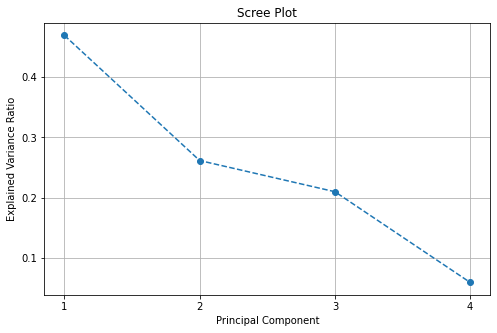

In [55]:
# Extract the features for PCA
features = df[['Throughput', 'Head Grade', 'CIL Recovery', 'OVERALL Recovery']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(features_standardized)

# Get the eigenvectors (principal components) from PCA
eigenvectors = pca.components_.T  # Transpose to match original features

# Create a DataFrame to display eigenvectors
eigenvectors_df = pd.DataFrame(eigenvectors, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=['Throughput', 'Head Grade', 'CIL Recovery', 'OVERALL Recovery'])

# Display eigenvectors DataFrame
print("Eigenvectors (Principal Components) vs Original Variables:")
print(eigenvectors_df)
# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()


The principal components (PCs) were selected based on the scree plot analysis. From the scree plot, it was determined that the first three components explain the most significant variance in the data. Therefore, three PCs were chosen for our analysis to ensure that we capture the essential patterns and relationships in the dataset without overcomplicating the model.


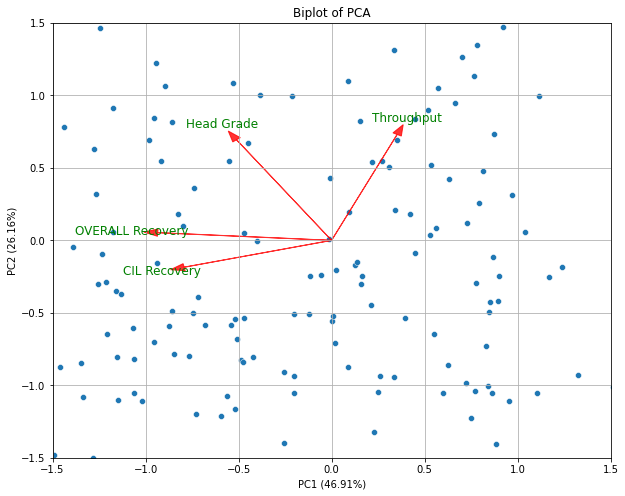

In [56]:
# Get the loadings or eigenvectors
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Plot biplot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)

# Plot variable vectors
for i, (pc1, pc2) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
    plt.arrow(0, 0, pc1, pc2, color='r', alpha=0.8, head_width=0.05)
    plt.text(pc1 * 1.15, pc2 * 1.15, df.columns[i], color='g', ha='center', va='center', fontsize=12)

# Add labels and title
plt.xlabel('PC1 ({}%)'.format(round(100 * pca.explained_variance_ratio_[0], 2)))
plt.ylabel('PC2 ({}%)'.format(round(100 * pca.explained_variance_ratio_[1], 2)))
plt.title('Biplot of PCA')

# Adjust limits for better visibility
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.grid(True)
plt.show()

  **INTERPRETATIONS OF THE BIPLOT AND THE FACTOR LOADINGS**

**PC1 (Principal Component 1):**


PC1 shows a strong negative loading on OVERALL Recovery, indicating days with lower overall recovery rates. There are also moderate negative loadings on CIL Recovery and Head Grade, suggesting lower CIL recovery rates and lower head grades on these days. There is a moderate positive loading on Throughput, indicating higher throughput on these days.

Implication: PC1 primarily represents operational days where the plant may be experiencing challenges in achieving high recovery rates (OVERALL Recovery). These days might involve lower CIL recovery rates and head grades, potentially due to processing difficulties or lower efficiency periods despite higher throughput. This could also suggest operational periods where the focus is on increasing throughput, potentially sacrificing some recovery efficiency.

**PC2 (Principal Component 2):**

PC2 has a strong positive loading on Throughput and a moderate positive loading on Head Grade, indicating that on the days both the throughput (the amount of ore processed) and the head grades (the quality of ore) are higher. There is also a moderate negative loading on CIL Recovery, meaning that on these days, the recovery rates from the CIL (Carbon-in-Leach) process tend to be lower.

Implication: PC2 represents days when the plant is processing a lot of ore (high throughput) and the ore is of higher quality (high head grade). However, despite the high production and quality, the efficiency of the CIL recovery process is lower on these days, which might indicate a trade-off between high throughput and recovery efficiency.

**PC3 (Principal Component 3):**

PC3 shows a strong positive loading on Head Grade, a moderate negative loading on CIL Recovery, and a negative loading on Throughput.
Implication: PC3 reflects days where the plant achieves higher head grades (Head Grade), but with lower CIL recovery rates (CIL Recovery) and lower throughput (Throughput).

PC3's strong positive loading on Head Grade indicates that days with higher head grades. This suggests that the ore processed on these days has higher concentrations of gold, which can contribute to better overall recovery rates.

The moderate negative loading on CIL Recovery in PC3 suggests that during these periods, the plant may experience lower CIL recovery rates. This could indicate challenges or inefficiencies in the CIL (Carbon in Leach) recovery process on these days.

PC3 shows a negative loading on Throughput, indicating days with lower throughput. This suggests that although head grades are higher, and potentially recovery rates could be good, the volume of ore processed during these periods is lower compared to other days.

# Data Denoising and Dimensionality Reduction Using Principal Component Analysis. 

This code performs Principal Component Analysis (PCA) on a dataset to reduce its dimensionality while preserving as much variance as possible. First, the Date column is dropped to focus on numeric features. The data is then standardized using StandardScaler, ensuring each feature has a mean of 0 and variance of 1, which is crucial for PCA. PCA is applied to reduce the dataset to two principal components. The standardized data is reconstructed from these principal components and then de-standardized back to the original scale. This process allows for dimensionality reduction while retaining the structure and scale of the original data, making it easier to analyze and visualize significant patterns and trends.

In [128]:

# Extract the features for PCA
features = df[['Throughput', 'Head Grade', 'CIL Recovery', 'OVERALL Recovery']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_standardized)

# Reconstruct the original data from principal components
reconstructed_features = pca.inverse_transform(principal_components)

# Create a DataFrame with the reconstructed original data
df_reconstructed = pd.DataFrame(data=reconstructed_features, columns=['Throughput', 'Head Grade', 'CIL Recovery', 'OVERALL Recovery'])
# Display the reconstructed DataFrame
print(df_reconstructed)

# Destandardize the reconstructed features
reconstructed_features = scaler.inverse_transform(reconstructed_features)

# Create a DataFrame with the destandardized reconstructed data
df_destandardized = pd.DataFrame(data=reconstructed_features, columns=['Throughput', 'Head Grade', 'CIL Recovery', 'OVERALL Recovery'])


# Display the destandardized reconstructed DataFrame
print(df_destandardized)

     Throughput  Head Grade  CIL Recovery  OVERALL Recovery
0     -1.038333   -0.535865      0.637458          0.435721
1     -1.113392   -0.235094      0.965835          0.852687
2     -1.061027   -0.849151      0.400634          0.102844
3     -1.015513   -0.599232      0.560966          0.340828
4     -0.680643   -1.109427     -0.212540         -0.575175
..          ...         ...           ...               ...
174    1.010207   -0.351127     -1.345646         -1.414507
175    0.635336   -0.978083     -1.475949         -1.749376
176    0.309224   -0.345931     -0.610172         -0.703712
177    0.711517   -0.544306     -1.194727         -1.333481
178    0.849181   -0.796750     -1.548221         -1.758533

[179 rows x 4 columns]
     Throughput  Head Grade  CIL Recovery  OVERALL Recovery
0    184.257872    2.586629      0.915993          0.949706
1    182.966352    2.961256      0.923108          0.957460
2    183.867382    2.196414      0.910862          0.943515
3    184.650526 

**Visualizing the transformed data reveals more significant patterns and trends compared to the original data.**

<AxesSubplot:>

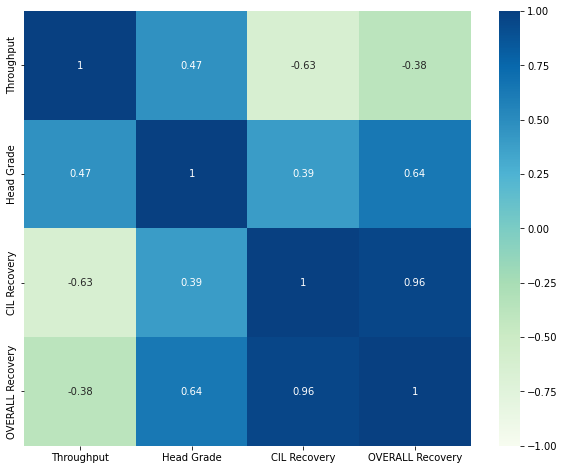

In [147]:
corr = df_destandardized.corr()
plt.figure(figsize = [10, 8])

sns.heatmap(corr,cmap='GnBu',vmin = -1,vmax = 1, annot=True)



**Throughput:**
Moderate positive correlation with Head Grade (0.47).
Moderate negative correlation with CIL Recovery (-0.63).
Moderate negative correlation with OVERALL Recovery (-0.38).

**Head Grade:**
Moderate positive correlation with Throughput (0.47).
Moderate positive correlation with OVERALL Recovery (0.64).

**CIL Recovery:**
Moderate negative correlation with Throughput (-0.63).
Moderate positive correlation with Head Grade (0.39).

**OVERALL Recovery:**
Strong positive correlation with CIL Recovery (0.96).
Moderate positive correlation with Head Grade (0.64).

# SCATTER PLOTS

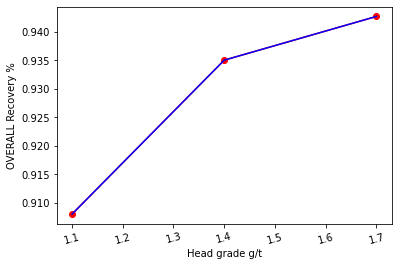

In [144]:
bin_edges = np.arange(0.4, 2+0.1, 0.3)
bin_centers = bin_edges[:-1]+0.1
## Cut the bin values into discrete intervals. Returns a Series object.
grade_binned = pd.cut(data['Head Grade'], bin_edges, include_lowest = True)

comb_mean = data['OVERALL Recovery'].groupby(grade_binned).mean()
comb_std = data['OVERALL Recovery'].groupby(grade_binned).std()
plt.errorbar(x=bin_centers, y=comb_mean, color='b')
plt.plot(bin_centers, comb_mean, color='r', marker='o', linestyle='-', label='Mean Line')
plt.xticks(rotation=15);
plt.ylabel('OVERALL Recovery %');
plt.xlabel('Head grade g/t');

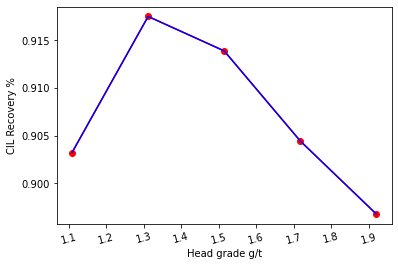

In [143]:
bin_edges = np.arange(0.4, 2+0.1, 0.203)
bin_centers = bin_edges[:-1]+0.1
## Cut the bin values into discrete intervals. Returns a Series object.
grade_binned = pd.cut(data['Head Grade'], bin_edges, include_lowest = True)

comb_mean = data['CIL Recovery'].groupby(grade_binned).mean()
comb_std = data['CIL Recovery'].groupby(grade_binned).std()
plt.errorbar(x=bin_centers, y=comb_mean, color='b')
plt.plot(bin_centers, comb_mean, color='r', marker='o', linestyle='-', label='Mean Line')
plt.xticks(rotation=15);
plt.ylabel('CIL Recovery %');
plt.xlabel('Head grade g/t');

The relationship between head grade and Carbon-in-Leach (CIL) recovery is complex due to various metallurgical factors. Our analysis indicates a positive correlation between head grade and overall recovery: as the head grade increases, overall recovery also increases. This is because higher head grades signify a greater concentration of gold in the ore, resulting in more gold being available for recovery during the concentration process, which in turn enhances KC (Knelson Concentrator) recovery and positively affects overall recovery.

However, an inverse relationship is observed between head grade and CIL recovery: as head grade decreases, CIL recovery tends to increase, and conversely, as head grade increases, CIL recovery tends to decrease. This inverse relationship can be attributed to several factors. Higher head grades result in higher gold concentrations in the leach solution, which can lead to rapid loading of the activated carbon. If the activated carbon becomes saturated quickly, it may not be able to adsorb additional gold effectively, also With higher head grades, the consumption of cyanide can increase, potentially leading to insufficient free cyanide available for effective leaching, resulting in higher gold losses in the tailings.

C:\Users\louis\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\louis\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


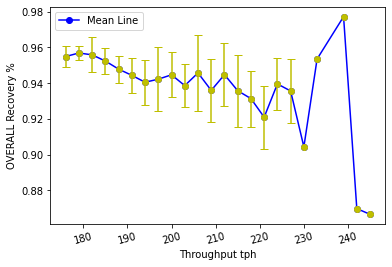

In [109]:
# Define bin edges and centers based on the specified range
bin_edges = np.arange(160, 370, 3)  # Adjust bin width as needed
bin_centers = bin_edges[:-1] + 1  # Adjust bin center calculation based on bin width

# Cut the bin values for the 'Oxygen Concentration ppm' variable
binned = pd.cut(df_destandardized['Throughput'], bin_edges, include_lowest=True)

# Remove empty bins
binned_counts = data.groupby(binned).size()
non_empty_bins = binned_counts[binned_counts > 0].index

# Calculate mean and std for non-empty bins
comb_mean = df_destandardized['OVERALL Recovery'].groupby(binned).mean().loc[non_empty_bins]
comb_std = df_destandardized['OVERALL Recovery'].groupby(binned).std().loc[non_empty_bins]

# Ensure 'comb_mean' and 'bin_centers' have the same size
non_empty_bin_centers = bin_centers[binned_counts > 0]

# Plot with error bars
plt.errorbar(x=non_empty_bin_centers, y=comb_mean,yerr=comb_std, color='y', fmt='o', capsize=4)
# Add a line through the mean points
plt.plot(non_empty_bin_centers, comb_mean, color='b', marker='o', linestyle='-', label='Mean Line')

plt.xticks(rotation=15)
plt.ylabel('OVERALL Recovery %')
plt.xlabel('Throughput tph')

# Add legend
plt.legend()
# Show the plot
plt.show()

C:\Users\louis\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\louis\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


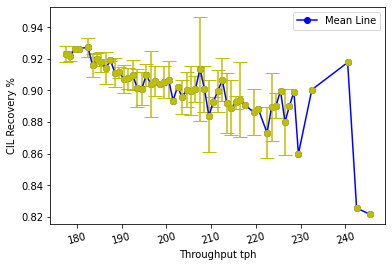

In [108]:
# Define bin edges and centers based on the specified range
bin_edges = np.arange(170, 370, 1)  # Adjust bin width as needed
bin_centers = bin_edges[:-1] + 0.5  # Adjust bin center calculation based on bin width

# Cut the bin values for the 'Oxygen Concentration ppm' variable
binned = pd.cut(df_destandardized['Throughput'], bin_edges, include_lowest=True)

# Remove empty bins
binned_counts = df_destandardized.groupby(binned).size()
non_empty_bins = binned_counts[binned_counts > 0].index

# Calculate mean and std for non-empty bins
comb_mean = df_destandardized['CIL Recovery'].groupby(binned).mean().loc[non_empty_bins]
comb_std = df_destandardized['CIL Recovery'].groupby(binned).std().loc[non_empty_bins]

# Ensure 'comb_mean' and 'bin_centers' have the same size
non_empty_bin_centers = bin_centers[binned_counts > 0]

# Plot with error bars
plt.errorbar(x=non_empty_bin_centers, y=comb_mean,yerr=comb_std, color='y', fmt='o', capsize=7)
# Add a line through the mean points
plt.plot(non_empty_bin_centers, comb_mean, color='b', marker='o', linestyle='-', label='Mean Line')

plt.xticks(rotation=15)
plt.ylabel('CIL Recovery %')
plt.xlabel('Throughput tph')

# Add legend
plt.legend()
# Show the plot
plt.show()

Additionally, there is a negative correlation between throughput and both overall recovery and CIL recovery. As throughput increases, both overall recovery and CIL recovery tend to decrease. This is likely due to the reduced residence time of the ore pulp in the leach and adsorption tanks, leading to insufficient contact between the gold-cyanide complex and the activated carbon, thus resulting in lower gold recovery. Moreover, higher throughput can strain the processing capacity of the plant, exacerbating these inefficiencies and further decreasing overall recovery.



# LINE PLOTS

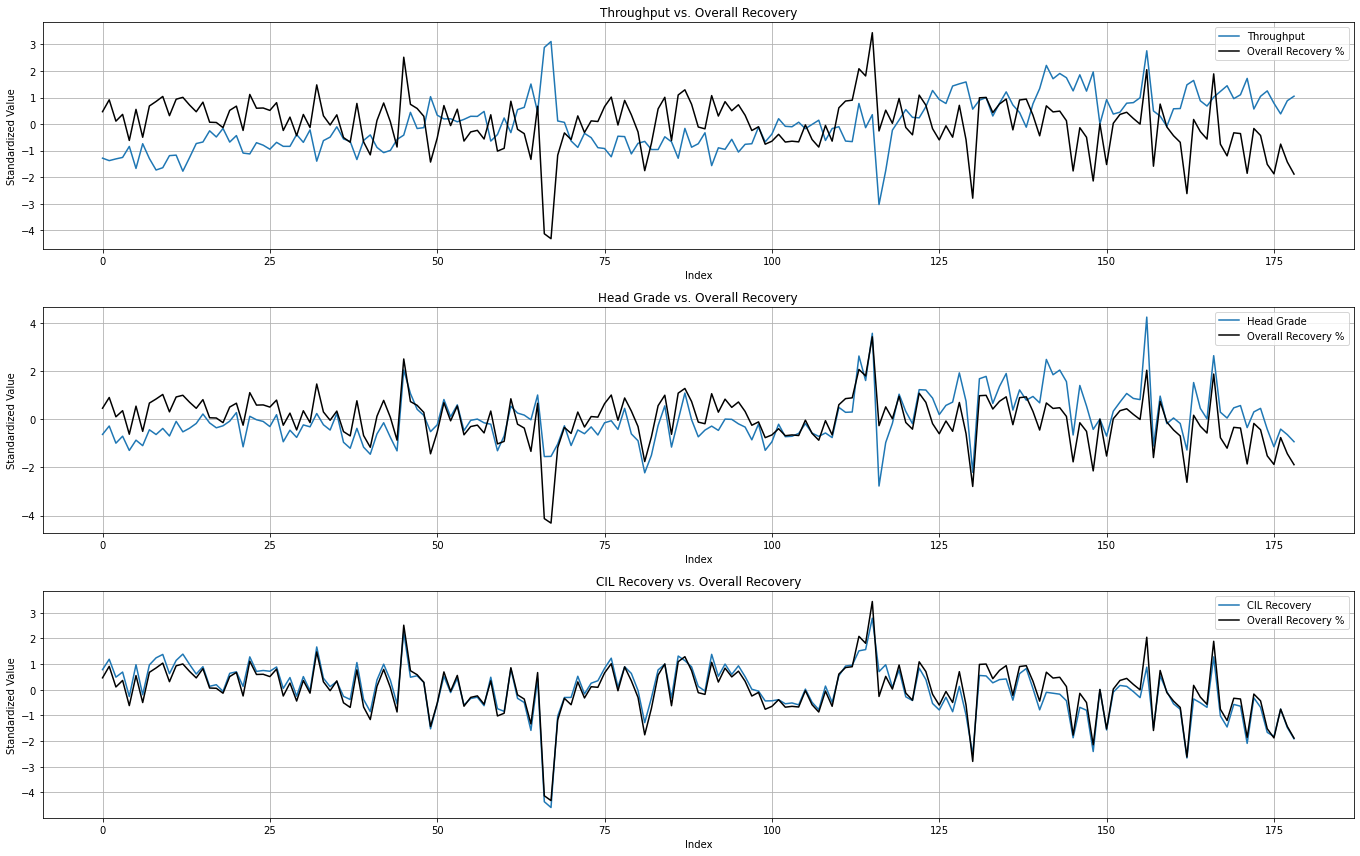

In [125]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_destandardized), columns=df_destandardized.columns, index=df_destandardized.index)

# Increase figure size
plt.figure(figsize=(19, 12))  # Adjust width and height as needed

# Plot each variable against overall recovery in separate subplots
num_variables = len(df_standardized.columns) - 1  # Exclude Overall Recovery
num_cols = 1  # Number of columns for subplots
num_rows = (num_variables + num_cols - 1) // num_cols  # Number of rows for subplots

for i, column in enumerate(df_standardized.columns):
    if column == 'OVERALL Recovery':
        continue
    plt.subplot(num_rows, num_cols, i + 1)
    plt.plot(df_standardized.index, df_standardized[column], marker='', label=column)
    plt.plot(df_standardized.index, df_standardized['OVERALL Recovery'], linestyle='-', color='black', label='Overall Recovery %')  # Plot overall recovery
    plt.xlabel('Index')
    plt.ylabel('Standardized Value')
    plt.title(f'{column} vs. Overall Recovery')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


The line graph depicts the relationships between head grade, CIL recovery, throughput, and overall recovery in gold processing. There is a discernible association between head grade and overall recovery, where variations in head grade correspond to changes in overall recovery rates. This suggests that ore quality, as indicated by head grade, plays a significant role in influencing the effectiveness of the gold recovery process. Higher head grades likely contribute to increased gold extraction efficiency through various processing methods utilized.

Additionally, the graph indicates a notable connection between CIL recovery and overall recovery. Changes in CIL recovery appear to coincide with shifts in overall recovery rates, highlighting the critical importance of the CIL process in achieving higher gold recovery from the leach solution. Conversely, the relationship between throughput and overall recovery shows less apparent alignment. Variations in throughput levels do not consistently reflect changes in overall recovery rates, indicating that variations in throughput levels appear to correlate more closely with changes in CIL recovery rates **(from the correlation analysis in previous sections)** rather than with KC recovery rates. This suggests that higher throughput levels may affect the efficiency of the CIL process more significantly than that of the KC process.

The stronger impact of throughput on CIL recovery can be attributed to several factors. Increased throughput often leads to reduced residence time of the ore pulp in the leach and adsorption tanks used in the CIL process. This shortened contact time between the gold-cyanide complex and the activated carbon can limit the effectiveness of gold adsorption onto the carbon, thereby reducing CIL recovery rates. In contrast, the KC process, which involves physical separation based on density differences, may be less sensitive to variations in throughput as it operates independently of the residence time dynamics affecting CIL recovery.

These findings underscore the importance of carefully managing throughput levels in gold processing operations to optimize the efficiency of specific recovery processes like CIL, which play a critical role in achieving overall gold recovery targets.

# Conclusions and Recommendations

**Conclusions**

The analysis of operational data from the mining site has revealed several key insights into the factors influencing gold recovery processes. Through detailed examination of variables such as plant throughput, head grade, Carbon-in-Leach (CIL) recovery, Knelson Concentrator (KC) recovery, and overall recovery, significant relationships have been identified. The findings indicate that while higher throughput and head grade can enhance gold extraction potential, they also pose challenges to recovery efficiencies, particularly in the CIL process. The Principal Component Analysis (PCA) facilitated a deeper understanding of these dynamics by uncovering patterns that explain variations in recovery rates across different operational conditions.

**Recommendations**

Based on the insights gained from the analysis, the following recommendations are proposed to optimize gold recovery processes and enhance operational performance:

**Optimize Process Conditions:** Implement strategies to balance throughput and recovery efficiencies. This includes optimizing residence times in leaching and adsorption tanks to ensure sufficient contact between the gold-cyanide complex and activated carbon during the CIL process. Adjustments in cyanide dosage and pH levels should also be considered to maximize gold recovery without compromising environmental and operational safety.

**Enhance Monitoring and Control Systems:** Invest in advanced monitoring technologies and real-time data analytics to improve process control. Continuous monitoring of key parameters such as cyanide concentration, pulp density, and carbon activity can help detect operational deviations early and facilitate proactive decision-making to mitigate potential losses in gold recovery.

**Invest in Training and Skill Development:** Enhance the skills and knowledge of operational staff involved in gold recovery processes. Training programs focusing on process optimization, equipment maintenance, and safety protocols can empower personnel to identify inefficiencies, troubleshoot issues effectively, and implement best practices to maximize overall recovery rates.

**Conduct Regular Performance Reviews:** Establish a robust system for conducting regular performance reviews and benchmarking against industry standards. Utilize key performance indicators (KPIs) derived from **data analytics** to monitor progress, identify areas for improvement, and drive continuous operational optimization efforts.

**Author:** Louis Ziemah